<a href="https://colab.research.google.com/github/ashishgeddam2002/data-science-assignment-excelr/blob/main/Decision_tree_assignmnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error,classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df =pd.read_csv("heart_disease.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [ ]:
print(df.describe(include='all'))

               age   sex            cp    trestbps        chol    fbs restecg  \
count   908.000000   908           908  908.000000  908.000000    908     908   
unique         NaN     2             4         NaN         NaN      2       3   
top            NaN  Male  asymptomatic         NaN         NaN  False  normal   
freq           NaN   718           495         NaN         NaN    723     542   
mean     53.791850   NaN           NaN  133.430617  201.484581    NaN     NaN   
std       9.158031   NaN           NaN   20.401608  112.097949    NaN     NaN   
min      29.000000   NaN           NaN    0.000000    0.000000    NaN     NaN   
25%      47.750000   NaN           NaN  120.000000  176.750000    NaN     NaN   
50%      54.000000   NaN           NaN  130.000000  224.000000    NaN     NaN   
75%      60.000000   NaN           NaN  144.000000  270.000000    NaN     NaN   
max      77.000000   NaN           NaN  200.000000  603.000000    NaN     NaN   

            thalch  exang  

In [ ]:
print(df.dtypes)

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object


In [ ]:
# Finding out if there are any null values
print(df.isna().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [ ]:
# Mapping categorical values to numerical
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['fbs'] = df['fbs'].astype(int)


In [ ]:
# Cleaning and mapping the 'exang' column
df['exang'] = df['exang'].replace({'FALSE': False, 'TRUE': True, 'TURE':True}) # Catch the typo and map it to True
df['exang'] = df['exang'].astype(int)

In [ ]:
# Mapping the 'restecg' column
df['restecg'] = df['restecg'].replace({'normal': 0, 'st-t abnormality': 1, 'lv hypertrophy': 2})


In [ ]:
print(f"Percentage of missing values in column oldpeak: {df['oldpeak'].isna().mean() * 100}")

Percentage of missing values in column oldpeak: 6.828193832599119


In [ ]:
# Filling missing values in 'oldpeak' with the median
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())

In [ ]:
# Confirming no missing values remain
print(df['oldpeak'].isna().sum())

0


<Figure size 700x2800 with 0 Axes>

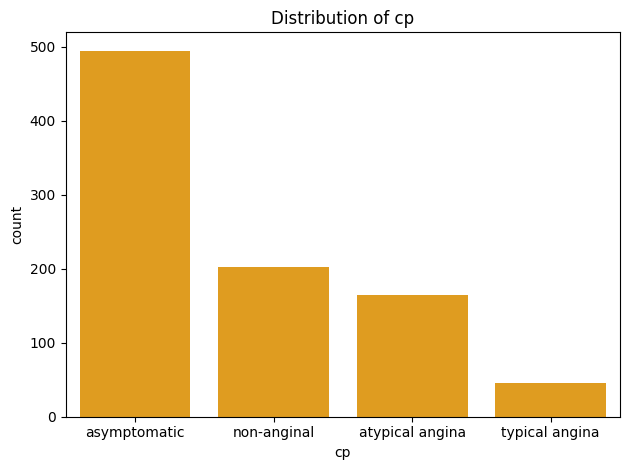

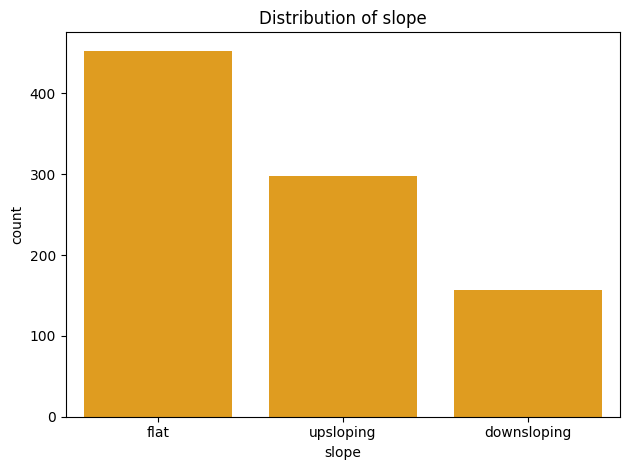

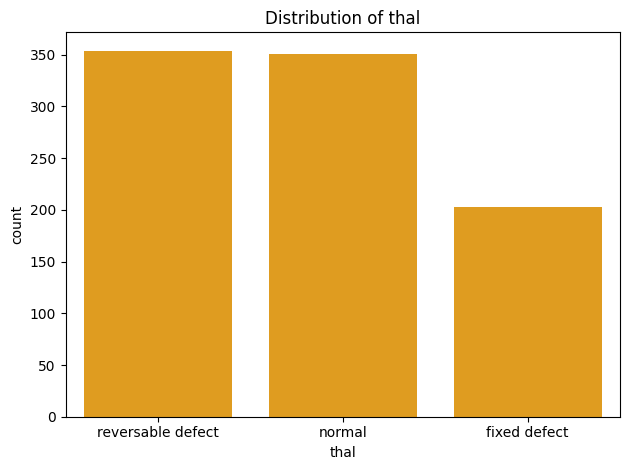

In [ ]:
# Univariate Analysis - Barplot for categorical columns
plt.figure(figsize=(7,28))
for i in df.select_dtypes(include='object').columns:
    plt.subplots()
    sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), color='Orange')
    plt.title(f'Distribution of {i}')
    plt.tight_layout()
    plt.show()

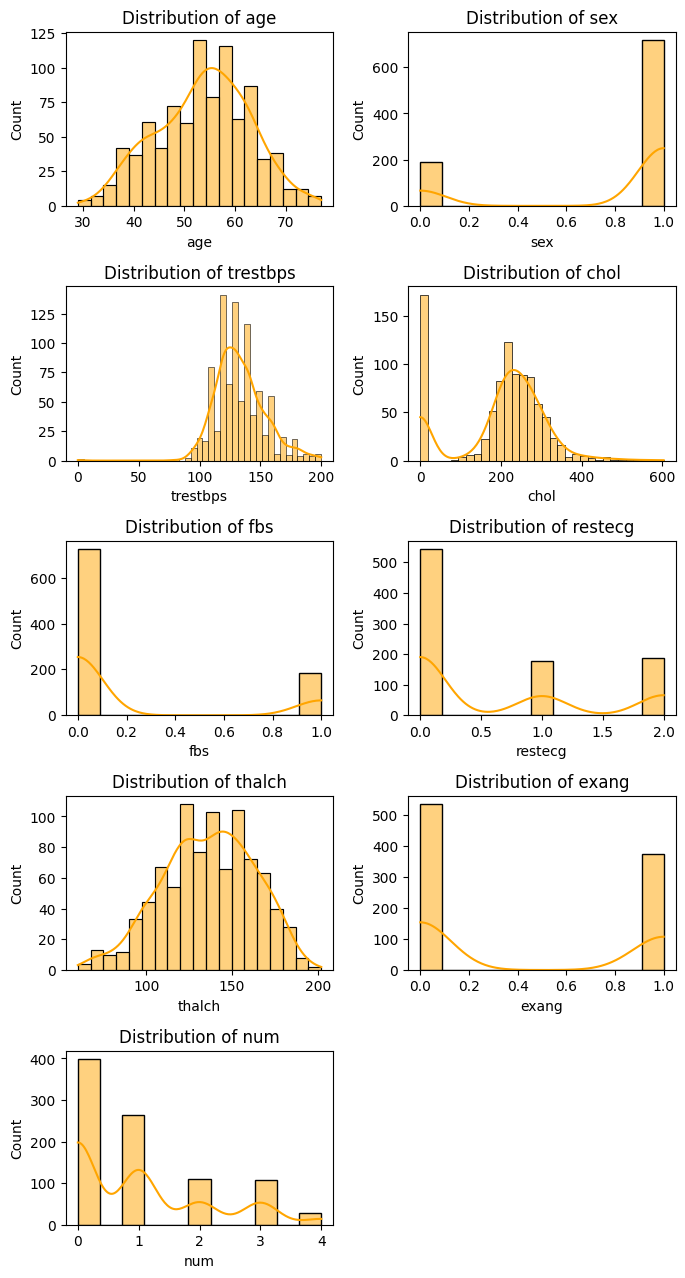

In [ ]:
# Univariate Analysis - Distribution plot for numerical data
data = df.select_dtypes(include=int)
plt.figure(figsize=(7,15))
for i, column in enumerate(data.columns, 1):
    plt.subplot(6,2,i)
    sns.histplot(data[column], kde=True, color='Orange')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


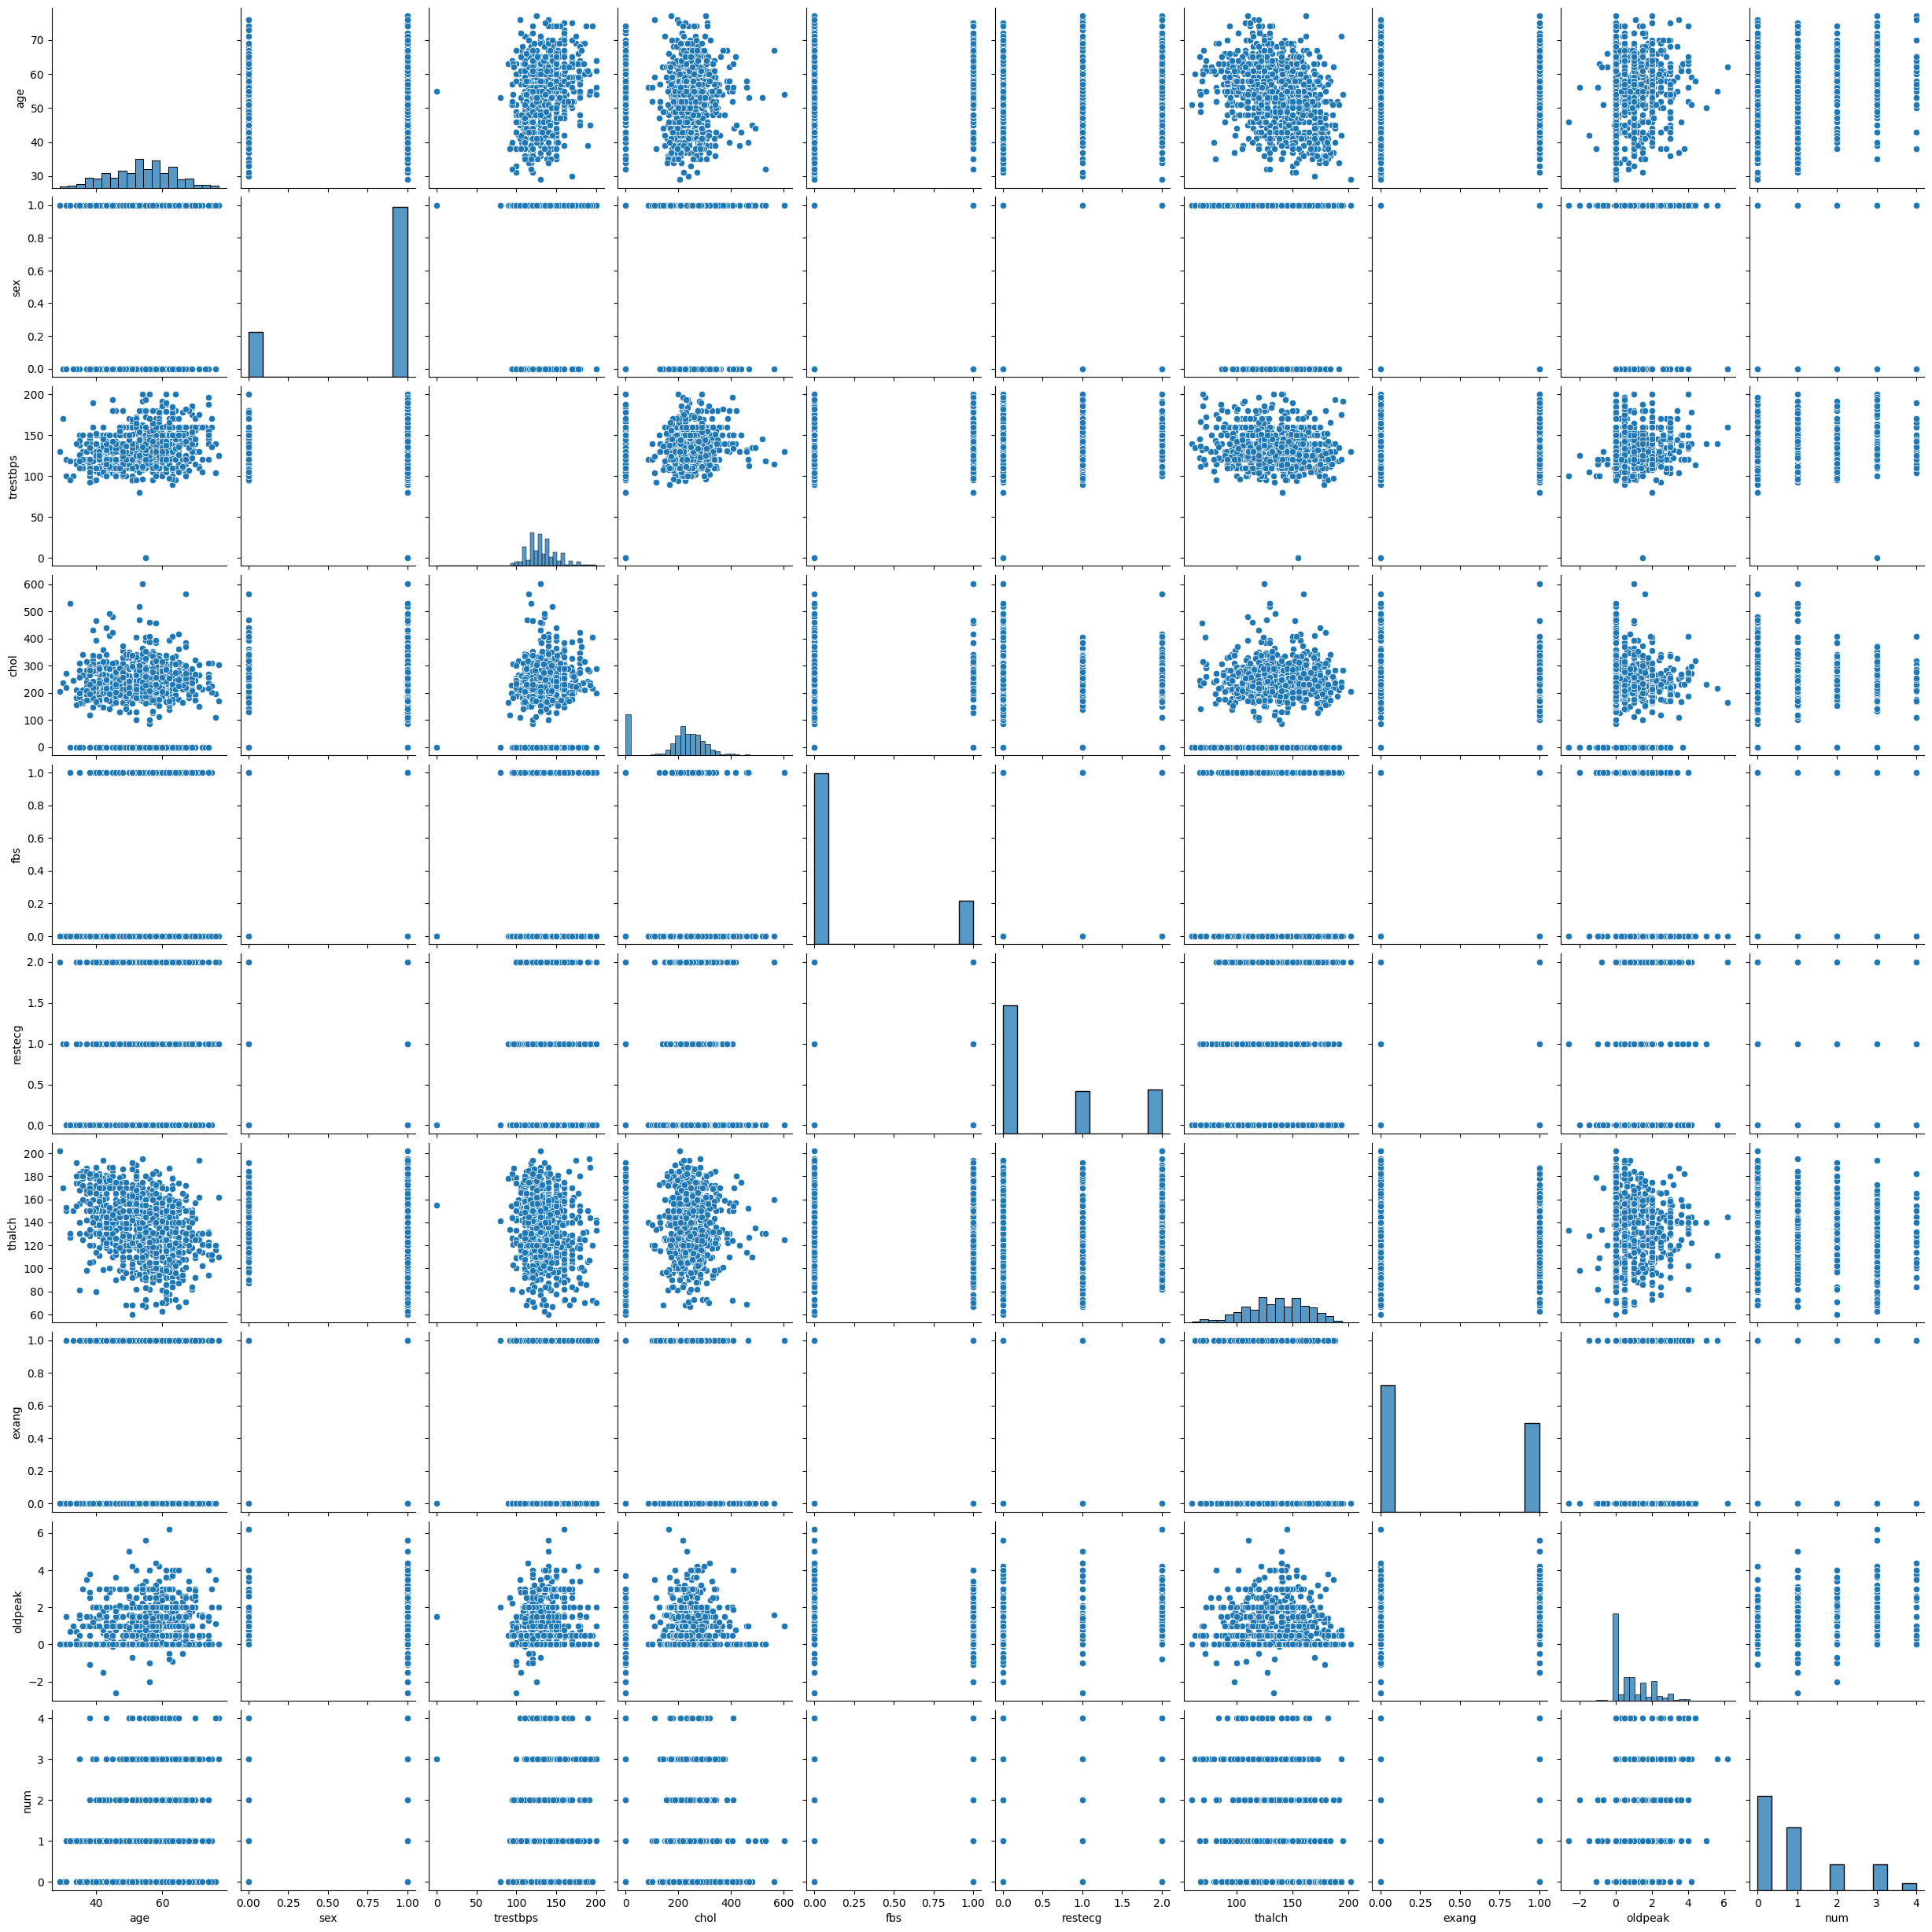

In [ ]:
# Bivariate Analysis
sns.pairplot(df)
plt.show()

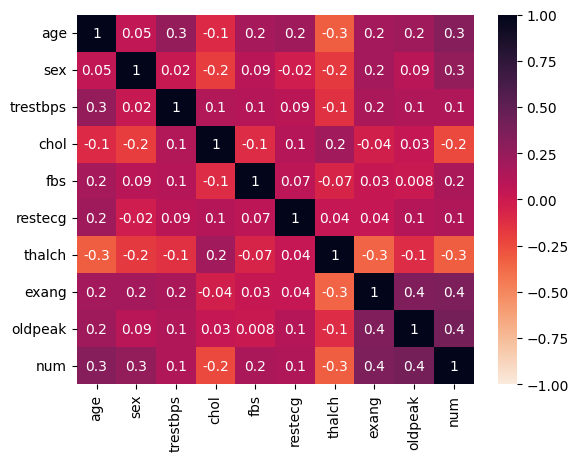

In [ ]:
# Multivariate Analysis - Heatmap for correlation between columns
sns.heatmap(df.select_dtypes(exclude='object').corr(), vmax=1, center=0, vmin=-1, annot=True, fmt='.1g', cmap="rocket_r")
plt.show()

In [ ]:
# Data Encoding - Converting categorical data to numerical format
df = pd.get_dummies(df, columns=['cp', 'thal', 'slope'], dtype=int)
print(df.head())

   age  sex  trestbps  chol  fbs  restecg  thalch  exang  oldpeak  num  \
0   63    1       145   233    1        2     150      0      2.3    0   
1   41    1       135   203    0        0     132      0      0.0    0   
2   57    1       140   192    0        0     148      0      0.4    0   
3   52    1       118   186    0        2     190      0      0.0    0   
4   57    1       110   201    0        0     126      1      1.5    0   

   cp_asymptomatic  cp_atypical angina  cp_non-anginal  cp_typical angina  \
0                0                   0               0                  1   
1                0                   1               0                  0   
2                1                   0               0                  0   
3                0                   0               0                  1   
4                1                   0               0                  0   

   thal_fixed defect  thal_normal  thal_reversable defect  slope_downsloping  \
0           

In [ ]:
# Data Scaling - Scaling down the data
sc = StandardScaler()
x = sc.fit_transform(df.drop(columns='num'))
scaled_df = pd.DataFrame(data=x, columns=df.drop(columns='num').columns)
print(scaled_df.head())

        age       sex  trestbps      chol       fbs   restecg    thalch  \
0  1.006027  0.514416  0.567394  0.281297  1.976894  1.725276  0.524183   
1 -1.397560  0.514416  0.076967  0.013526 -0.505844 -0.755406 -0.147705   
2  0.350503  0.514416  0.322181 -0.084656 -0.505844 -0.755406  0.449529   
3 -0.195767  0.514416 -0.756760 -0.138211 -0.505844  1.725276  2.017268   
4  0.350503  0.514416 -1.149102 -0.004325 -0.505844 -0.755406 -0.371668   

      exang   oldpeak  cp_asymptomatic  cp_atypical angina  cp_non-anginal  \
0 -0.834983  1.354403        -1.094782           -0.471246       -0.536603   
1 -0.834983 -0.815718        -1.094782            2.122034       -0.536603   
2 -0.834983 -0.438305         0.913424           -0.471246       -0.536603   
3 -0.834983 -0.815718        -1.094782           -0.471246       -0.536603   
4  1.197629  0.599578         0.913424           -0.471246       -0.536603   

   cp_typical angina  thal_fixed defect  thal_normal  thal_reversable defect  \


In [ ]:
# Splitting the dataset into training and testing sets
x = scaled_df
y = df['num']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=1, test_size=0.2)

In [ ]:
# Print the train-test split data
print(xtrain.head(), xtest.head(), ytrain.head(), ytest.head())

          age       sex  trestbps      chol       fbs   restecg    thalch  \
612  0.569011  0.514416 -0.413461 -1.798388 -0.505844 -0.755406 -0.632958   
486 -1.506814  0.514416  0.910694  0.192040 -0.505844 -0.755406  1.681324   
494 -0.305021  0.514416  0.322181  0.870392 -0.505844 -0.755406  1.382707   
677  1.443043  0.514416 -0.658674  0.316999 -0.505844 -0.755406 -2.424660   
233 -0.632783 -1.943951  2.283891  0.950723 -0.505844  0.484935 -0.408995   

        exang   oldpeak  cp_asymptomatic  cp_atypical angina  cp_non-anginal  \
612  1.197629  0.033460         0.913424           -0.471246       -0.536603   
486 -0.834983 -0.815718         0.913424           -0.471246       -0.536603   
494  1.197629  0.693931         0.913424           -0.471246       -0.536603   
677 -0.834983  0.127813         0.913424           -0.471246       -0.536603   
233 -0.834983  1.071344        -1.094782            2.122034       -0.536603   

     cp_typical angina  thal_fixed defect  thal_normal  

In [ ]:
# Model Training - Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=1)
dt_classifier.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=1)

In [ ]:
# Model Prediction
ypred = dt_classifier.predict(xtest)

In [ ]:
# Model Evaluation
print(f"Accuracy: {accuracy_score(ytest, ypred)}")
print(classification_report(ytest, ypred))

Accuracy: 0.47802197802197804
              precision    recall  f1-score   support

           0       0.63      0.68      0.65        81
           1       0.42      0.35      0.38        52
           2       0.28      0.37      0.32        19
           3       0.30      0.28      0.29        25
           4       0.00      0.00      0.00         5

    accuracy                           0.48       182
   macro avg       0.33      0.33      0.33       182
weighted avg       0.47      0.48      0.47       182



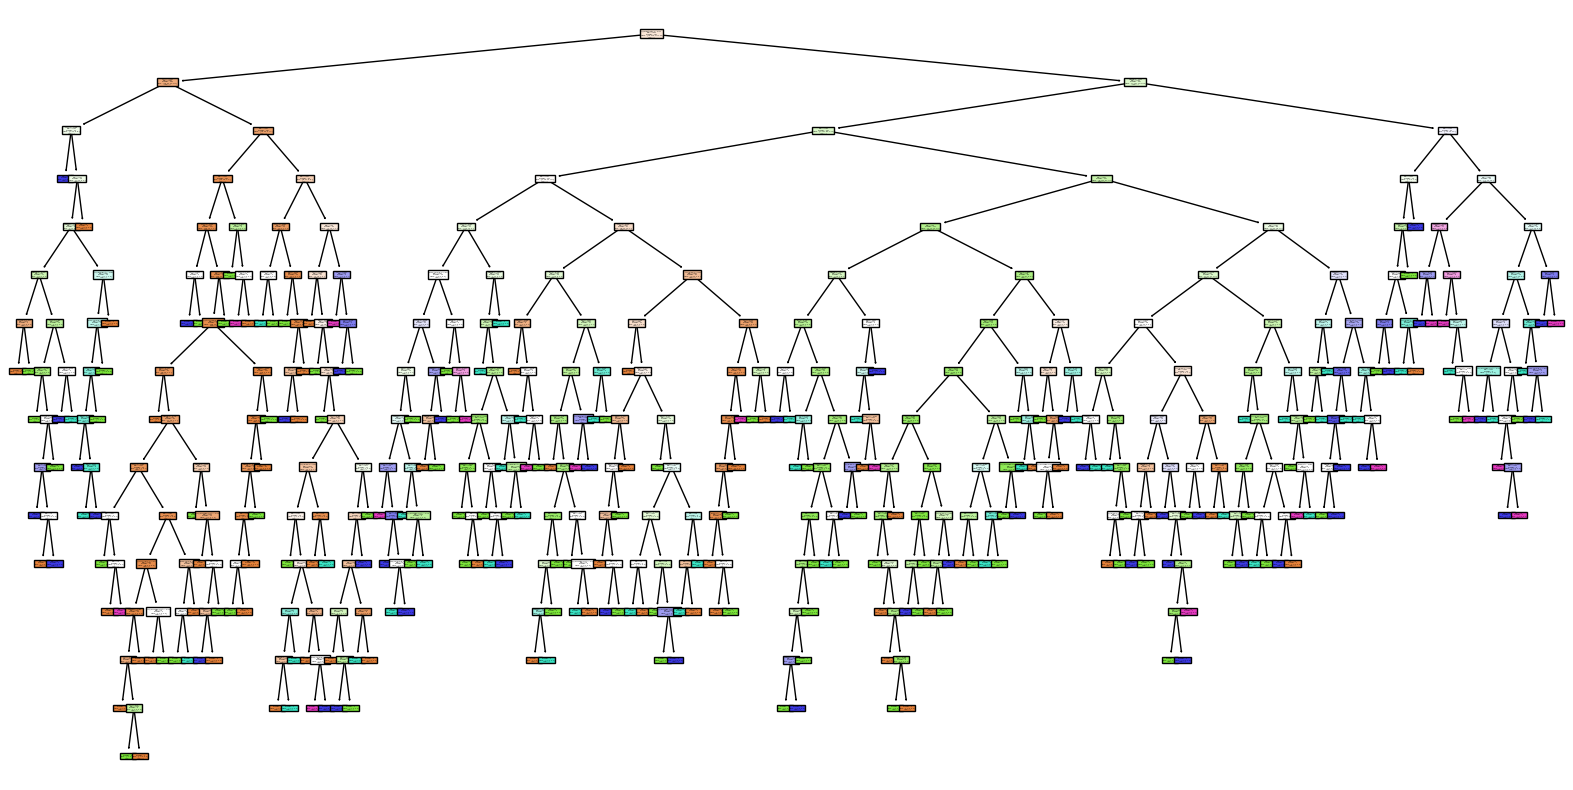

In [ ]:
# Decision Tree Visualization
plt.figure(figsize=(20,10))
tree.plot_tree(dt_classifier, filled=True, feature_names=x.columns, class_names=['0', '1', '2', '3', '4'])
plt.show()

In [ ]:
# Model Tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
# Best Parameters from GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [ ]:
# Retraining with Best Parameters
best_dt_classifier = grid_search.best_estimator_
best_dt_classifier.fit(xtrain, ytrain)

# Model Prediction with Best Parameters
ypred_best = best_dt_classifier.predict(xtest)

In [ ]:
# Model Evaluation with Best Parameters
print(f"Accuracy with Best Parameters: {accuracy_score(ytest, ypred_best)}")
print(classification_report(ytest, ypred_best))

Accuracy with Best Parameters: 0.5274725274725275
              precision    recall  f1-score   support

           0       0.65      0.91      0.76        81
           1       0.35      0.35      0.35        52
           2       0.33      0.11      0.16        19
           3       0.18      0.08      0.11        25
           4       0.00      0.00      0.00         5

    accuracy                           0.53       182
   macro avg       0.30      0.29      0.28       182
weighted avg       0.45      0.53      0.47       182



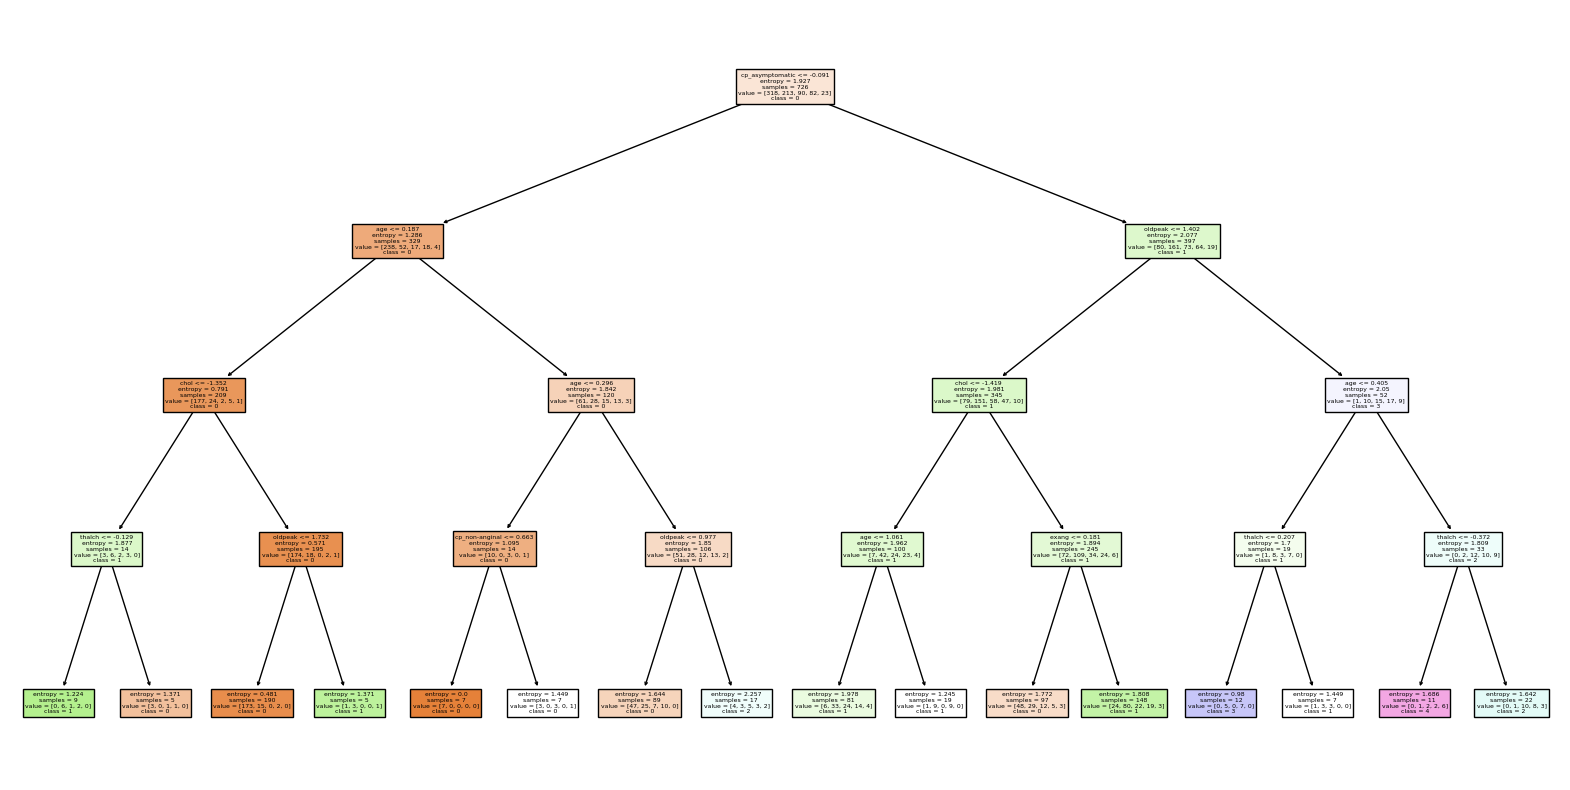

In [ ]:
# Final Decision Tree Visualization
plt.figure(figsize=(20,10))
tree.plot_tree(best_dt_classifier, filled=True, feature_names=x.columns, class_names=['0', '1', '2', '3', '4'])
plt.show()

Interview Questions:

What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
criterion: Determines the function used to measure the quality of a split. Common options are:

'gini': Gini impurity.
'entropy': Information gain based on entropy.
max_depth: Maximum depth of the tree. Limits how deep the tree can grow. A smaller depth prevents overfitting but might underfit, while a larger depth may overfit.

min_samples_split: Minimum number of samples required to split an internal node. Increasing this number prevents the model from learning overly specific patterns, thus reducing overfitting.

min_samples_leaf: Minimum number of samples required to be at a leaf node. Ensures that leaf nodes have enough samples to make the decision reliable.

max_features: Number of features to consider when looking for the best split. Reducing this number can help with overfitting and increase model robustness by introducing randomness.

max_leaf_nodes: Maximum number of leaf nodes in the tree. Limits the number of terminal nodes in the tree and can help with controlling overfitting.

min_impurity_decrease: A node will only be split if the impurity decrease is greater than this value. Helps in controlling the tree growth and complexity.

These hyperparameters impact the model’s performance by controlling the tree’s complexity, affecting its ability to generalize to unseen data.

What is the difference between the Label encoding and One-hot encoding?
Label Encoding:

What: Converts categorical values into numerical labels.
How: Each unique category value is assigned an integer value (e.g., 'Red' -> 0, 'Green' -> 1, 'Blue' -> 2).
Pros: Simple and efficient for models that can handle categorical data as numerical values.
Cons: Implies an ordinal relationship between categories that may not exist, potentially leading to misleading interpretations for certain algorithms.
One-Hot Encoding:

What: Converts categorical values into a binary matrix (one column per category).
How: Each category is represented by a binary vector where only one element is 1 (the index of the category), and all others are 0 (e.g., for 'Red', [1, 0, 0]; for 'Green', [0, 1, 0]; for 'Blue', [0, 0, 1]).
Pros: Avoids the implication of ordinality and is more suitable for algorithms that do not handle categorical data directly.
Cons: Can lead to high-dimensional data if there are many unique categories, potentially increasing computational cost and risk of overfitting.